In [98]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
root = os.getcwd()
data_root = os.path.join(root, 'data')

In [3]:
recovered_df = pd.read_csv(os.path.join(data_root, 'time_series_covid_19_recovered.csv'))

deaths_df = pd.read_csv(os.path.join(data_root, 'time_series_covid_19_deaths.csv'))

confirmed_df = pd.read_csv(os.path.join(data_root, 'time_series_covid_19_confirmed.csv'))

In [6]:
open_line_df = pd.read_csv(os.path.join(data_root, 'COVID19_open_line_list.csv'))
line_df = pd.read_csv(os.path.join(data_root, 'COVID19_line_list_data.csv'))
data_df = pd.read_csv(os.path.join(data_root, 'covid_19_data.csv'))

In [13]:
data_df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [46]:
agg_data = data_df\
.groupby(['ObservationDate', 'Country/Region'])\
.agg({'Confirmed': sum, 'Deaths': sum, 'Recovered': sum})\
.reset_index()\
.sort_values(by=['Country/Region', 'ObservationDate'])


In [58]:
agg_data['new_confirmed'] = agg_data\
.groupby(['Country/Region'])['Confirmed'].transform(lambda x: x.diff().fillna(0))

agg_data['new_deaths'] = agg_data\
.groupby(['Country/Region'])['Deaths'].transform(lambda x: x.diff().fillna(0))

agg_data['new_recovered'] = agg_data\
.groupby(['Country/Region'])['Recovered'].transform(lambda x: x.diff().fillna(0))

In [93]:
agg_data.sort_values(by=['Country/Region', 'ObservationDate'], inplace=True)

In [94]:
agg_data.columns

Index(['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered',
       'new_confirmed', 'new_deaths', 'new_recovered'],
      dtype='object')

In [99]:
start_date = min(agg_data['ObservationDate'])

start_date = datetime.strptime(start_date, '%m/%d/%Y')

In [107]:
agg_data['days_after'] = agg_data['ObservationDate'].apply(lambda x: 
                                                           (datetime.strptime(x, '%m/%d/%Y') - start_date).days)



In [110]:
agg_data.loc[agg_data['Country/Region']=='Vietnam']

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,new_confirmed,new_deaths,new_recovered,days_after
23,01/23/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0,1
34,01/24/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0,2
48,01/25/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0,3
63,01/26/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0,4
81,01/27/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...
3396,03/19/2020,Vietnam,85.0,0.0,16.0,10.0,0.0,0.0,57
3571,03/20/2020,Vietnam,91.0,0.0,16.0,6.0,0.0,0.0,58
3751,03/21/2020,Vietnam,94.0,0.0,17.0,3.0,0.0,1.0,59
3936,03/22/2020,Vietnam,113.0,0.0,17.0,19.0,0.0,0.0,60


In [73]:
agg_data['Country/Region'].value_counts()

Thailand               62
Macau                  62
Hong Kong              62
Japan                  62
Taiwan                 62
                       ..
Republic of Ireland     1
St. Martin              1
Bahamas                 1
 Azerbaijan             1
('St. Martin',)         1
Name: Country/Region, Length: 203, dtype: int64

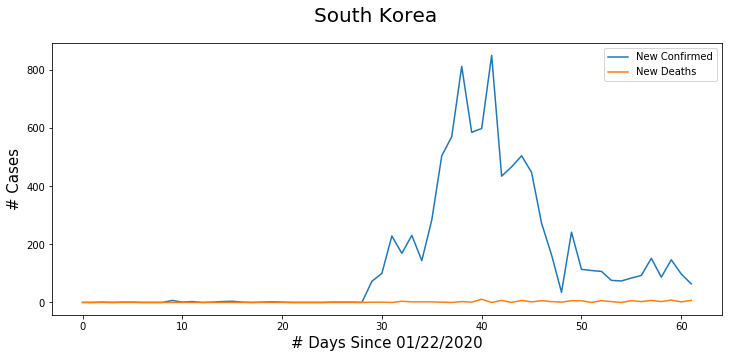

In [114]:
country = 'South Korea'
data = agg_data.loc[agg_data['Country/Region']==country]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data.days_after, data.new_confirmed)
ax.plot(data.days_after, data.new_deaths)
ax.set_xlabel('# Days Since 01/22/2020', fontsize=15)
ax.set_ylabel('# Cases', fontsize=15)
ax.legend(['New Confirmed', 'New Deaths'], loc='best')
fig.suptitle(country, fontsize=20)
plt.show()

In [122]:
(agg_data['Country/Region']).unique()

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'Colombia', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Guiana', 'G

In [120]:
agg_data.loc[agg_data['Country/Region']=='United States of America'].shape

(0, 9)

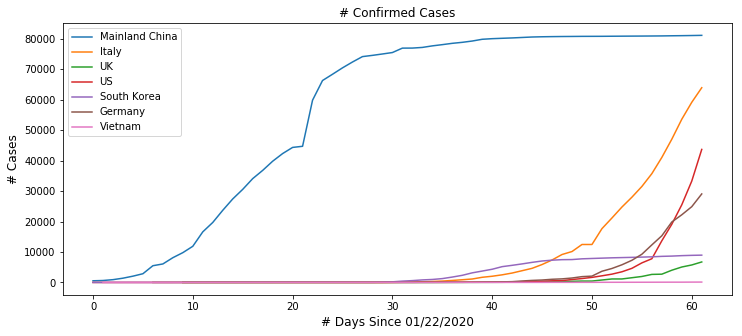

In [146]:

fig, ax = plt.subplots(figsize=(12, 5))
for country in ['Mainland China', 'Italy', 'UK', 'US', 'South Korea', 'Germany', 'Vietnam']:
    data = agg_data.loc[agg_data['Country/Region']==country]
    ax.plot(data.days_after, data.Confirmed, label=country)
    ax.set_xlabel('# Days Since 01/22/2020', fontsize=12)
    ax.set_ylabel('# Cases', fontsize=12)
plt.title('# Confirmed Cases')
plt.legend()
plt.show()

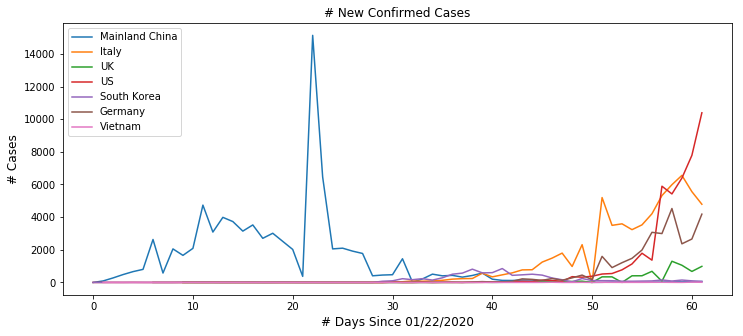

In [147]:
fig, ax = plt.subplots(figsize=(12, 5))
for country in ['Mainland China', 'Italy', 'UK', 'US', 'South Korea', 'Germany', 'Vietnam']:
    data = agg_data.loc[agg_data['Country/Region']==country]
    ax.plot(data.days_after, data.new_confirmed, label=country)
    ax.set_xlabel('# Days Since 01/22/2020', fontsize=12)
    ax.set_ylabel('# Cases', fontsize=12)
plt.title('# New Confirmed Cases')
plt.legend()
plt.show()

# Data on open_line_df

In [141]:
open_line_df.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [149]:
line_df.columns

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [155]:
line_df.shape

(1085, 27)

In [158]:
line_df['summary'][0]


'First confirmed imported COVID-19 pneumonia patient in Shenzhen (from Wuhan): male, 66, shenzheng residence, visited relatives in Wuhan on 12/29/2019, symptoms onset on 01/03/2020, returned to Shenzhen and seek medical care on 01/04/2020, hospitalized on 01/11/2020, sample sent to China CDC for testing on 01/18/2020, confirmed on 01/19/2020. 8 others under medical observation, contact tracing ongoing.'

In [167]:
line_df.iloc[0]

id                                                                       1
case_in_country                                                        NaN
reporting date                                                   1/20/2020
Unnamed: 3                                                             NaN
summary                  First confirmed imported COVID-19 pneumonia pa...
location                                               Shenzhen, Guangdong
country                                                              China
gender                                                                male
age                                                                     66
symptom_onset                                                     01/03/20
If_onset_approximated                                                    0
hosp_visit_date                                                   01/11/20
exposure_start                                                  12/29/2019
exposure_end             

In [174]:
line_df['symptom_onset'].isnull()

0       False
1       False
2       False
3        True
4        True
        ...  
1080     True
1081     True
1082     True
1083     True
1084    False
Name: symptom_onset, Length: 1085, dtype: bool

In [165]:
def get_datetime(str_date):
    return datetime.strptime(str_date, '%m/%d/%Y')

In [178]:
def get_symptom(symptom_onset, exposure_start):
#     if symptom_onset.isnull() or exposure_start.isnull():
#         return(-1)
    symptom_onset = datetime.strptime(symptom_onset, '%m/%d/%y')
    exposure_start = datetime.strptime(exposure_start, '%m/%d/%y')
    return (symptom_onset -  exposure_start).days

In [184]:
line_df['symptom_onset']

0        01/03/20
1       1/15/2020
2        01/04/20
3             NaN
4             NaN
          ...    
1080          NaN
1081          NaN
1082          NaN
1083          NaN
1084    2/17/2020
Name: symptom_onset, Length: 1085, dtype: object

In [183]:
get_symptom(line_df.iloc[0]['symptom_onset'], line_df.iloc[0]['exposure_start'])

ValueError: unconverted data remains: 19

In [179]:
line_df.apply(lambda x: get_symptom(x.symptom_onset, x.exposure_start), axis=1)

ValueError: ('unconverted data remains: 19', 'occurred at index 0')

In [171]:
line_df.apply(lambda x: (get_datetime(x['symptom_onset']) - get_datetime(x['exposure_start']) ), 
             axis=1)

ValueError: ("time data '01/03/20' does not match format '%m/%d/%Y'", 'occurred at index 0')

In [ ]:
df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)